In [125]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import norm
from funciones import *
import pandas as pd

### **Consigna 1**


Tenemos que probar que 
$$
(I - A)^{-1} = I + A + A^2 + A^3 + \dots + A^n + \dots => \lim_{n \to \infty} A^{n+1} = 0
$$

Empecemos viendo la siguiente igualdad:

$$
(I - A)^{-1} = I + A + A^2 + A^3 + \dots
$$

Aca, la suma infinita es una serie geométrica aplicada a matrices. La inversa de $I - A$ se está descomponiendo en la suma de las potencias de $A$, similar a lo que sucede en la serie geométrica para números reales:
$$
\frac{1}{1 - x} = 1 + x + x^2 + x^3 + \dots
$$
donde $ |x| < 1 $.

Para demostrar lo que nos piden, comenzamos con la expresión finita de la serie, truncada en el término $n$, es decir:

$$
S_n = I + A + A^2 + A^3 + \dots + A^n
$$

Multiplicamos ambos lados por $I - A$ a izquierda:

$$
(I - A)S_n = (I - A)(I + A + A^2 + A^3 + \dots + A^n)
$$

El lado derecho se simplifica utilizando las propiedades distributivas y cancelando términos sucesivos:

$$
(I - A)(I + A + A^2 + \dots + A^n) = I - A^{n+1}
$$

De este modo, obtenemos la relación:

$$
(I - A)S_n = I - A^{n+1}
$$

Sabemos que $ (I - A)^{-1}$ es la suma **infinita** de las potencias de $A$, por lo que cuando $n \to \infty$, la serie truncada $S_n$ tiende a la inversa de $I - A$:

$$
S_n \to (I - A)^{-1} \quad \text{cuando} \quad n \to \infty
$$

Por lo tanto, tomando el límite cuando $n \to \infty$ en la ecuación: 
$$(I - A)S_n = I - A^{n+1}$$
obtenemos:

$$
(I - A) \lim_{n \to \infty}S_n= \lim_{n \to \infty} I - A^{n+1}
$$


$$
(I - A)(I - A)^{-1}= \lim_{n \to \infty} I - A^{n+1}
$$

aplicando las propiedades basicas de limite y dado que $ (I - A)(I - A)^{-1} = I $, obtenemos:
$$
I =  I - \lim_{n \to \infty} A^{n+1}
$$

Por lo que se deduce:

$$
\lim_{n \to \infty} A^{n+1} = 0
$$

### **Consigna 2**

Nos piden graficar para las dos matrices $\mathbf{A_1}$ y $\mathbf{A_2}$, dos vectores definidos de la forma: $a_1(n) = \| \mathbf{A_1^n} \|_2 $ y $a_2(n) = \| \mathbf{A_2^n} \|_2 $ donde las matrices son:
$$
\mathbf{A_1} =
\begin{pmatrix}
0.186 & 0.521 & 0.014 & 0.32  & 0.134 \\
0.24  & 0.073 & 0.219 & 0.013 & 0.327 \\
0.098 & 0.12  & 0.311 & 0.302 & 0.208 \\
0.173 & 0.03  & 0.133 & 0.14  & 0.074 \\
0.303 & 0.256 & 0.323 & 0.225 & 0.257
\end{pmatrix}
\quad
\mathbf{A_2} =
\begin{pmatrix}
0.186 & 0.521 & 0.014 & 0.32  & 0.134 \\
0.24  & 0.073 & 0.219 & 0.013 & 0.327 \\
0.098 & 0.12  & 0.311 & 0.302 & 0.208 \\
0.173 & 0.03  & 0.133 & 0.14  & 0.074 \\
0.003 & 0.256 & 0.323 & 0.225 & 0.257
\end{pmatrix}
$$


In [10]:
# Primero definimos las matrices del enunciado con numpy

A1 = np.array([[0.186, 0.521, 0.014, 0.32, 0.134],
               [0.24, 0.073, 0.219, 0.013, 0.327],
               [0.098, 0.12, 0.311, 0.302, 0.208],
               [0.173, 0.03, 0.133, 0.14, 0.074],
               [0.303, 0.256, 0.323, 0.225, 0.257]])

A2 = np.array([[0.186, 0.521, 0.014, 0.32, 0.134],
               [0.24, 0.073, 0.219, 0.013, 0.327],
               [0.098, 0.12, 0.311, 0.302, 0.208],
               [0.173, 0.03, 0.133, 0.14, 0.074],
               [0.003, 0.256, 0.323, 0.225, 0.257]])


In [126]:
# Ahora vamos a crear los vectors correspondientes
N = 250
a1 = np.zeros(N)
a2 = np.zeros(N)

A1_potencia = np.eye(A1.shape[0])  # Id del tam de A1
A2_potencia = np.eye(A2.shape[0])  # Id del tam de A2

for n in range(N):
    A1_potencia = A1_potencia @ A1  # Potencia de A1
    A2_potencia = A2_potencia @ A2  # Potencia de A2
    a1[n] = norm(A1_potencia, 2)  # Norma 2 de A1^n
    a2[n] = norm(A2_potencia, 2)  # Norma 2 de A2^n


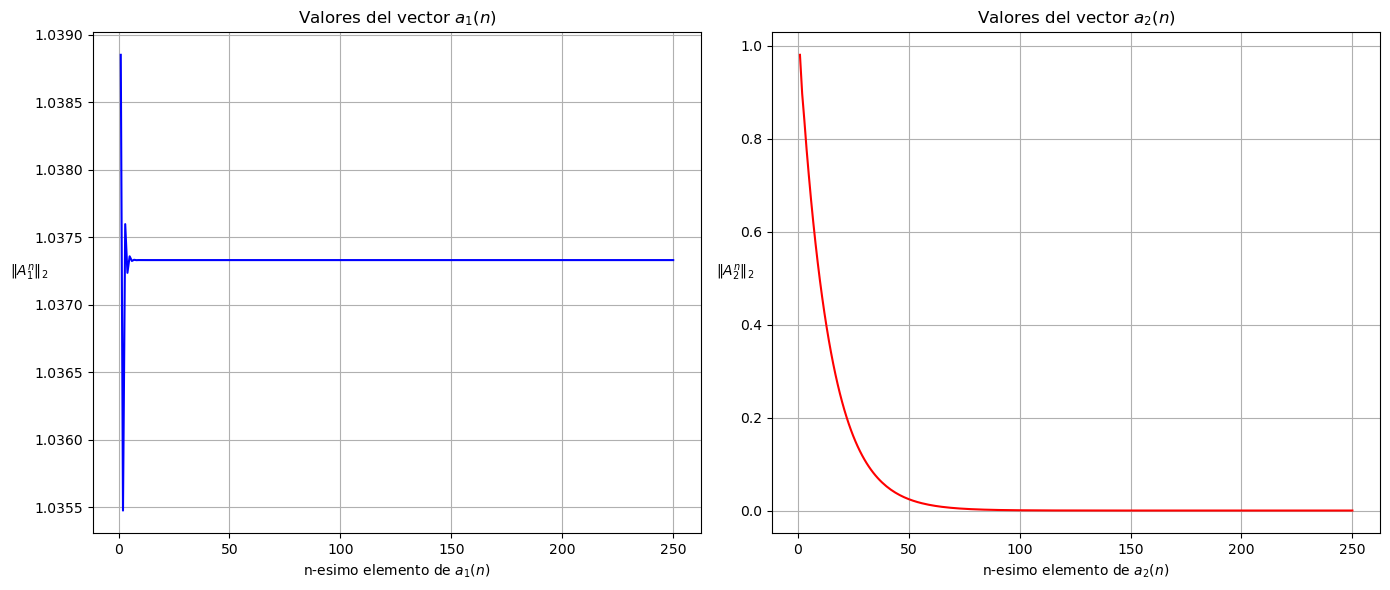

In [127]:
# Graficamos los resultados en dos figuras lado a lado
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

#a1(n)
ax1.plot(range(1, N+1), a1, color='blue')
ax1.set_title('Valores del vector $a_1(n)$')
ax1.set_xlabel('n-esimo elemento de $a_1(n)$')
ax1.set_ylabel('$\|A_1^n\|_2$', rotation=0)
ax1.grid(True)

#a2(n)
ax2.plot(range(1, N+1), a2, color='red')
ax2.set_title('Valores del vector $a_2(n)$')
ax2.set_xlabel('n-esimo elemento de $a_2(n)$')
ax2.set_ylabel('$\|A_2^n\|_2$', rotation=0)
ax2.grid(True)

plt.tight_layout()
plt.show()

### **Consigna 3**

En esta consigna nos piden encontrar, mediante el método de la potencia, el mayor autovalor de las matrices $A_1$ y $A_2$.

Nosotros sabemos que, dada una matriz $A \in \mathbb{R}^{nxn}$ diagonalizable (es decir, existe una base de autovectores) con la propiedad que tiene un solo valor propio de módulo máximo, entonces podemos ordenar sus autovalores de la siguiente manera:

$|\lambda_1| > |\lambda_2| \geq |\lambda_3| \geq ... \geq |\lambda_n|$

Y si consideramos un vector $v^{(0)} \in \mathbb{R}^n$, cualquiera no nulo, y calculamos distintos términos de la sucesión definida recursivamente por:

$v^{(k)} = \frac{A v^{(k-1)}}{||A v^{(k-1)}||_2}$, para $k \geq 1$

Entonces, el método de la potencia nos asegura que a medida que $k \rightarrow +\infty$, los vectores $v_k$ se van alineando con el autovector $w$ del autovalor $\lambda_1$.

A partir de esto, podemos obtener el valor de $\lambda_1$, mediante el cociente de Rayleigh:

$r(v) = \frac{v^T A v}{v^T v}$

Ahora bien, dado que el método de la potencia es inicializado con un vector aleatorio $v^{(0)}$, nos piden hacer el cálculo del autovalor estadísticamente con el método de Monte Carlo y se pide transcribir en una tabla el promedio de los autovalores de todas las iteraciones de Monte Carlo para cada matriz, poniendo además el desvío estandar encontrado.

In [128]:
# Creamos dos listas vacias donde vamos a guardar todos candidatos a mayor
# autovalor de las matrices A_1 y A_2:
autovaloresA_1 = []
autovaloresA_2 = []

# Realizamos el método de Monte Carlo unas 250 veces:
for i in range(250):
    autovalor_1 = metodoPotencia(A1, 1000)
    autovalor_2 = metodoPotencia(A2, 1000)
    
    autovaloresA_1.append(autovalor_1)
    autovaloresA_2.append(autovalor_2)

# Creamos la tabla:
tabla = pd.DataFrame()

# Definimos las matrices:
tabla["Matriz"] = ["Matriz 1", "Matriz 2"]

# Calculamos el promedio de los mayores autovalores calculados:
promedio_1 = np.mean(autovaloresA_1)
promedio_2 = np.mean(autovaloresA_2)

tabla["Promedio"] = [promedio_1, promedio_2]

# Calculamos el desvío estándar de los autovalores:
desvio_estandar_1 = np.std(autovaloresA_1)
desvio_estandar_2 = np.std(autovaloresA_2)

tabla["Desvío estandar"] = [desvio_estandar_1, desvio_estandar_2]

display(tabla)

,Matriz,Promedio,Desvío estandar
0,Matriz 1,1.000000,3.140185e-17
1,Matriz 2,0.927651,1.562222e-16


In [129]:
# Verificamos si los valores de los promedios obtenidos coinciden con los
# autovalores mayores:

autovalores_A1 = np.linalg.eig(A1)[0]
autovalores_A2 = np.linalg.eig(A2)[0]

print("Autovalor mayor de la matriz 1: ", autovalores_A1[0])
print("Autovalor mayor de la matriz 2: ", autovalores_A2[0])

Autovalor mayor de la matriz 1:  (1.0000000000000002+0j)
Autovalor mayor de la matriz 2:  (0.9276514472123603+0j)


Podemos observar que los valores de los autovalores de módulo mayor de cada matriz coinciden con los promedios obtenidos al realizar el Método de la Potencia 250 veces. Además, podemos observar que el desvío estandar obtenido para cada matriz es casi insignificante, lo cual nos da a entender que de las 250 veces que se repitio el experimento, los distintos valores diferian muy poco entre si. Esto nos indica que el Método de la Potencia es muy eficiente al momento de buscar el autovalor de mayor módulo de una matriz.

### **Consigna 4**


De forma similar a la consigna 2, tenemos que graficar la serie de potencias $(I − A)^{−1}$ de $A1$ y $A2$ (siguiendo la ecuación 4) para para $n = 10$ y $n = 100$

donde la ecuación 4 es 
$$
(I-A)^{-1} = I + A + A^2 + A^3 + \dots + A^n + \dots
$$


In [130]:
# Creamos los vectores correspondientes:
N = 100
a1 = np.zeros(N)
a2 = np.zeros(N)

A1_potencia = np.eye(A1.shape[0])  # Id del tam de A1
A2_potencia = np.eye(A2.shape[0])  # Id del tam de A2

suma_infinita_A1 = np.eye(A1.shape[0]) # Id del tam de A1
suma_infinita_A2 = np.eye(A2.shape[0]) # Id del tam de A2

for n in range(N):
    A1_potencia = A1_potencia @ A1  # Potencia de A1
    A2_potencia = A2_potencia @ A2  # Potencia de A2
    
    suma_infinita_A1 = suma_infinita_A1 + A1_potencia # Serie de potencias de A1
    suma_infinita_A2 = suma_infinita_A2 + A2_potencia # Serie de potencias de A2
    
    a1[n] = norm(suma_infinita_A1, 2) # Norma 2 de A1^n
    a2[n] = norm(suma_infinita_A2, 2) # Norma 2 de A2^n

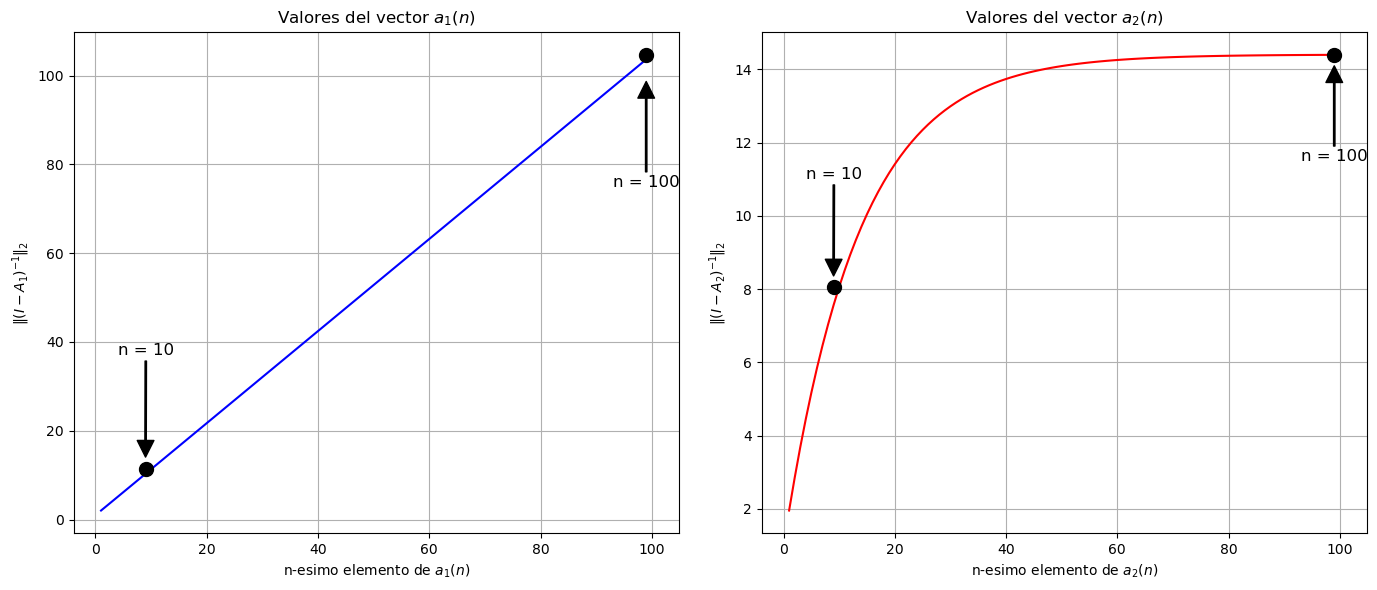

In [131]:
# Graficamos los resultados en dos figuras lado a lado
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

#a1(n)
ax1.plot(range(1, N+1), a1, color='blue')
ax1.set_title('Valores del vector $a_1(n)$')
ax1.set_xlabel('n-esimo elemento de $a_1(n)$')
ax1.set_ylabel('$\|(I - A_1)^{-1}\|_2$', rotation=90)
ax1.plot(9, a1[9], marker = 'o', color = 'black', markersize = 10, label = "n = 10")
ax1.plot(99, a1[99], marker = 'o', color = 'black', markersize = 10, label = "n = 100")
ax1.grid(True)
ax1.annotate('n = 10', xy = (9, a2[9] + 6), xytext = (4, 37), fontsize = 12, 
             arrowprops=dict(facecolor='black', width = 1))
ax1.annotate('n = 100', xy = (99, a1[99] - 6), xytext = (93, 75), fontsize = 12, 
             arrowprops=dict(facecolor='black', width = 1))

#a2(n)
ax2.plot(range(1, N+1), a2, color='red')
ax2.set_title('Valores del vector $a_2(n)$')
ax2.set_xlabel('n-esimo elemento de $a_2(n)$')
ax2.set_ylabel('$\|(I - A_2)^{-1}\|_2$', rotation=90)
ax2.plot(9, a2[9], marker = 'o', color = 'black', markersize = 10, label = "n = 10")
ax2.plot(99, a2[99], marker = 'o', color = 'black', markersize = 10, label = "n = 100")
ax2.grid(True)
ax2.annotate('n = 10', xy = (9, a2[9] + 0.3), xytext = (4, 11), fontsize = 12, 
             arrowprops=dict(facecolor='black', width = 1))
ax2.annotate('n = 100', xy = (99, a2[99] - 0.3), xytext = (93, 11.5), fontsize = 12, 
             arrowprops=dict(facecolor='black', width = 1))

plt.tight_layout()
plt.show()

Teniendo en cuenta lo que aprendimos y probamos en la consigna 1 de este TP, al mirar ambos gráficos, podemos decir que NO hay convergencia en ambas matrices. Para que la suma infinita tenga convergencia, la sucesión de sumas parciales tiene que tener un límite en el infinito positivo.

A simple vista podemos observar que la suma infinita de la matriz $A_2$ tiene un límite en el infinito positivo. Esto es así dado que se cumple que:

$$\lim_{n \to \infty} A^{n+1} = 0$$ 

como pudimos observar en el gráfico de la consigna 2.

Ahora bien, esto no ocurre en la suma infinita de la matriz $A_1$. El gráfico correspondiente a dicha matriz nos indica que la suma infinita de $A_1$ no posee límite en el infinito positivo. Si observamos el gráfico de la consigna 2 podemos observar que:

$$\lim_{n \to \infty} A^{n+1} \neq 0$$

Por lo tanto, podemos concluir que como regla para poder asegurar convergencia de la serie infinita se tiene que cumplir que las potencias sucesivas de la matriz se vuelvan pequeñas, es decir, que todas las entradas de la matriz se acerquen a cero.

Por último calculemos el error obtenido para cada matrices como un vector:

$$e(n) = \|(I + A + A^2 + A^3 + ... + A^n) - (I - A)^{-1}\|_2$$

y analicemos los resultados.

In [135]:
# Creamos los dos vectores de los errores:
N = 100
error_1 = np.zeros(N)
error_2 = np.zeros(N)

# Definimos las matrices identidad:
Id_1 = np.eye(A1.shape[0])  # Id del tam de A1
Id_2 = np.eye(A2.shape[0])  # Id del tam de A2

# Calculamos (I - A)^{-1}:
P1, L1, U1 = calcularLU(Id_1-A1)
P2, L2, U2 = calcularLU(Id_2-A2)

inv_1 = inversaLU(L1, U1, P1)
inv_2 = inversaLU(L2, U2, P2)

# Calculamos las sumas infinitas:
A1_potencia = np.eye(A1.shape[0])  # Id del tam de A1
A2_potencia = np.eye(A2.shape[0])  # Id del tam de A2

suma_infinita_A1 = np.eye(A1.shape[0]) # Id del tam de A1
suma_infinita_A2 = np.eye(A2.shape[0]) # Id del tam de A2

for n in range(N):
    A1_potencia = A1_potencia @ A1  # Potencia de A1
    A2_potencia = A2_potencia @ A2  # Potencia de A2
    
    suma_infinita_A1 = suma_infinita_A1 + A1_potencia # Serie de potencias de A1
    suma_infinita_A2 = suma_infinita_A2 + A2_potencia # Serie de potencias de A2

    error_1[n] = norm(suma_infinita_A1 - inv_1, 2)
    error_2[n] = norm(suma_infinita_A2 - inv_2, 2)

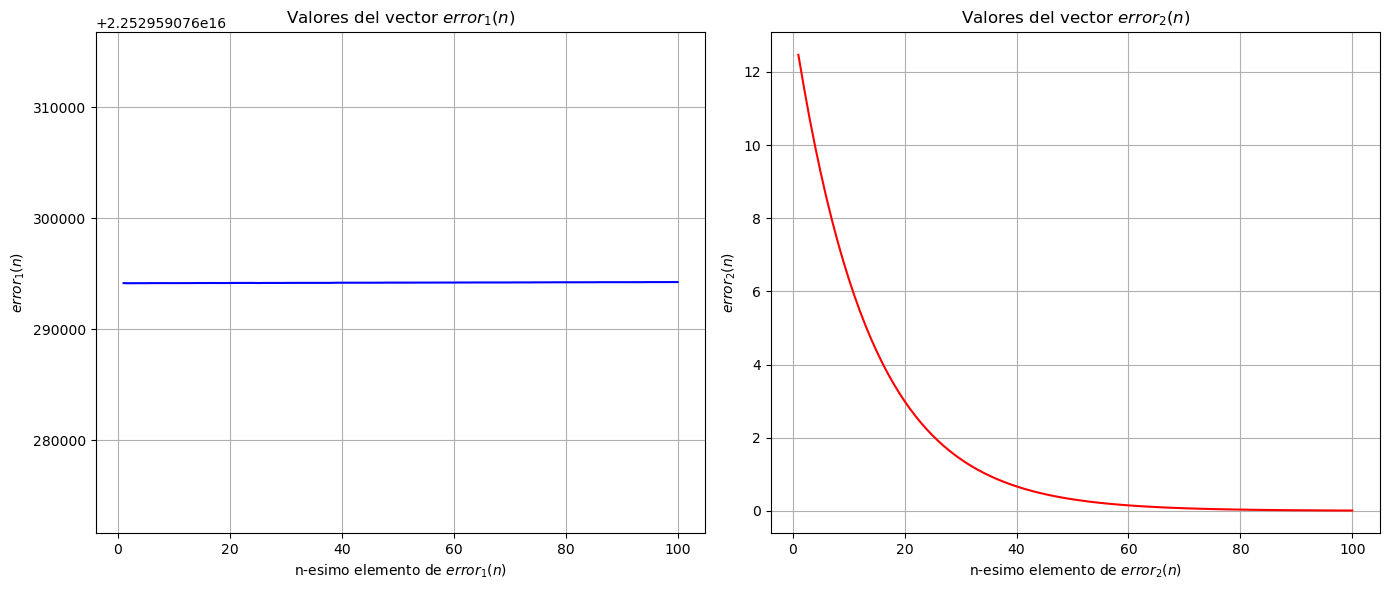

In [136]:
# Graficamos los distintos errores en dos figuras lado a lado:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

#error_1(n)
ax1.plot(range(1, N+1), error_1, color='blue')
ax1.set_title('Valores del vector $error_1(n)$')
ax1.set_xlabel('n-esimo elemento de $error_1(n)$')
ax1.set_ylabel('$error_1(n)$', rotation=90)
ax1.grid(True)


#error_2(n)
ax2.plot(range(1, N+1), error_2, color='red')
ax2.set_title('Valores del vector $error_2(n)$')
ax2.set_xlabel('n-esimo elemento de $error_2(n)$')
ax2.set_ylabel('$error_2(n)$', rotation=90)
ax2.grid(True)


plt.tight_layout()
plt.show()

Podemos observar que lo que aprendimos en la consigna 1 se ve reflejado perfectamente en estos dos gráficos:

$$
(I - A)^{-1} = I + A + A^2 + A^3 + \dots + A^n + \dots \Longleftrightarrow \lim_{n \to \infty} A^{n+1} = 0
$$

Nosotros sabemos que la matriz $A_1$ NO cumple con $\lim_{n \to \infty} A^{n+1} = 0$ entonces era esperable que la igualdad $(I - A)^{-1} = I + A + A^2 + A^3 + \dots + A^n + \dots$ no se cumpla, dado que podemos observar que el error calculado en este caso da un valor enorme y constante para cualquier n. En cambio, con la matriz $A_2$ ocurre lo contrario, el error converge a 0 a medida que el valor de n crece.

### **Consigna 5**

### **Consigna 6**

#### *Consigna a)*

Tenemos que:

$$
\begin{aligned}
E_n\;z &= \left(I_n - \frac{1}{n}ee^t\right)z \\
&= z - \frac{1}{n}ee^tz
\end{aligned}
$$

Notemos que $e^tz$ no es otra cosa que la suma de los elementos de $z$:

$$
e^tz = \sum_{i=1}^n z_i
$$

Veamos entonces de calcular el promedio de los componentes del vector $E_n z=v$:

$$
\begin{aligned}
\frac{1}{n} \sum_{i=1}^n v_i &= \frac{1}{n} \sum_{i=1}^n \left(z_i-\frac{1}{n}e_{i} \sum_{j=1}^n z_j\right) \\
&= \frac{1}{n} \sum_{i=1}^n z_i - \frac{1}{n} \sum_{i=1}^n \frac{1}{n}e_{i} \sum_{j=1}^n z_j
\end{aligned}
$$

Como $\sum_{i=1}^n \frac{1}{n} e_{i} = 1$, nos queda que:

$$
\begin{aligned}
\frac{1}{n} \sum_{i=1}^n v_i &= \frac{1}{n} \sum_{i=1}^n z_i - \frac{1}{n} \sum_{j=1}^n z_j \\
&= 0
\end{aligned}
$$

... tal como queriamos probar.

Ahora bien, si tenemos una matriz $A$ de $n\times n$ tenemos que $E_nA$ no es mas que aplicar $E_n$ en cada columna de $A$ de manera que $E_n a_j$ sera la version centrada de la columna $a_j$. Es decir, $E_n a_j$ tiene un promedio en sus componentes igual a $0$. En consecuencia, $E_n$ nos permite "centrar" la matriz $A$.

#### *Consigna b)*

Teniendo en cuenta la sugerencia dada en el enunciado, veamos primero lo que sucede con el vector $e$ cuando le aplicamos $E_n$:

$$
\begin{aligned}
E_n e &= \left(I_n - \frac{1}{n}ee^t\right)e \\
&= e - \frac{1}{n}e(e^te) \\
&= e - \frac{1}{n}e\;n\\
&= e - e \\
&= 0
\end{aligned}
$$

Esto nos dice que $e$ convive en el nucleo de $E_n$ y su autovalor asociado es $0$.

Siendo $\{d_1,...,d_n\}$ una base de $\langle\mathbf{e}\rangle^{\perp}$, vemos que para cualquier vector $d$ ortogonal a $e$ (ie.: $e^t d=0$) nos da lo siguiente:

$$
\begin{aligned}
E_n e &= \left(I_n - \frac{1}{n}ee^t\right)d \\
&= d - \frac{1}{n}e(e^td) \\
&= d - \frac{1}{n}e\;0\\
&= d - 0 \\
&= d
\end{aligned}
$$

Es decir, $E_n d = d$ nos indica que cualquiera de estos vectores $d$ tendran un autovalor asociado igual a $1$. 

Ademas, con todo esto podemos ver que el nucleo de $E_n$ es generado por $e$, siendo entonces la dimension del mismo igual a $1$. Por otro lado, tenemos que la imagen de $E_n$ esta dada por todo el subespacio ortogonal a $e$. Dicha imagen tiene dimension igual a $n-1$, pues estamos en $\mathbb{R}^n$ y restamos la direccion correspondiente al vector $e$. 


#### *Consigna c)*

Sabemos que una transformacion lineal $P:\mathbb{V}\rightarrow\mathbb{V}$ se dice proyector si:

$$
P^2=P
$$

Veamoslo para $E_n$:

$$
\begin{aligned}
E_n^2 &= \left(I_n-\frac{1}{n}ee^t\right)\left(I_n-\frac{1}{n}ee^t\right) \\
&= I_n - \frac{1}{n}ee^t-\frac{1}{n}ee^t+\frac{1}{n^2}ee^tee^t \\
&= I_n - \frac{1}{n}ee^t-\frac{1}{n}ee^t+\frac{1}{n}ee^t \\
&= I_n - \frac{1}{n}ee^t \\
&= E_n
\end{aligned}
$$

... como queriamos probar.

Tambien sabemos que una proyeccion es ortogonal si y solo si es una matriz simetrica, es decir:

$$
P=P^t
$$

Veamos:

$$
\begin{aligned}
E_n^t &= \left(I_n-\frac{1}{n}ee^t\right)^t \\
&= I_n^t - \left(\frac{1}{n}ee^t\right)^t \\
&= I_n - \frac{1}{n}ee^t \\
&= E_n
\end{aligned}
$$

De esta manera concluimos que $E_n$ es una matriz de proyeccion ortogonal. 

Como vimos en el item anterior, la matriz $E_n$ proyecta cualquier vector en el subespacio ortogonal al vector $e$. Es decir, el conjunto de todos los vectores $v$ en $\mathbb{R}^n$ que cumplen:

$$
e^tv=0
$$

#### *Consigna d)*

1. $E_n$ es una matriz ortogonal

    Para esto, deberia darse que:

$$
E_n^{-1}=E_n^t
$$

Si bien $E_n$ es una matriz de proyeccion ortogonal, esta no necesariamente es una matriz ortogonal en el sentido $E_n^tE_n=I$. Si $E_n$ fuese ortogonal, entonces tambien tendria que ser inversible, pero al tener un autovalor $0$ esto no se cumple. Por tanto, no es ortogonal.    

2. $E_n$ es singular

    Una matriz es singular si y solo si su determinante es nulo, o lo que es lo mismo, que alguno de sus autovalores sea igual a $0$. Esto ya vimos que es asi en el item b, por lo que $E_n$ es singular. 

3. $E_n$ es definida positiva

Sabemos que una matriz $A$ es definida positiva si y solo si, para todo vector $x\neq 0$, se cumple que:

$$
xAx^t>0
$$

... siendo todos sus autovalores positivos. 

Veamos como esto no se cumple con el vector $e$ visto antes:

$$
\begin{aligned}
e^tE_n e &= e^t\left(I_n-\frac{1}{n}ee^t\right)e \\
&= e^te-\frac{1}{n}e^tee^te
\end{aligned}
$$

Como tenemos que $e^te=1+1+...+1=n$, nos queda:

$$
\begin{aligned}
e^tE_n e &= n-\frac{1}{n} n n \\
&= n-n \\
&= 0
\end{aligned}
$$

Por lo que concluimos que $E_n$ no es definida positiva. 

4. $\text{traza}(E_n)=n-1$

La traza de una matriz es igual a la suma de sus autovalores. Como vimos en el item b, sus autovalores son: $\lambda = 0$ (de multplicidad $1$) y $\lambda = 1$ (de multplicidad $n-1$). Entonces:

$$
\text{traza}(E_n) = 0+(n-1)\cdot 1 = n-1
$$

### **Consigna 7**

In [ ]:
#agregar esto al archivo de funciones .py

def normalizar_matriz(A):
    n = A.shape[0]
    e = np.ones((n, 1))
    E = np.eye(n) - (1/n) * e @ e.T
    A_normalizada = E @ A
    return A_normalizada

def matriz_de_covarianzas(A_normalizada):
    """
    Esta funcion calcula una matriz de covarianzas a partir de una matriz normalizada
    """
    n = A_normalizada.shape[0]
    C = (A_normalizada.T @ A_normalizada) / (n - 1)
    return C

def deflacion_de_Hotelling(A, k, epsilon=):
    """
    Implementa el proceso de Deflación de Hotelling para encontrar los dos primeros autovalores y autovectores de A
    """
    #completar codigo

### **Consigna 8**

Primero creamos la matriz de proyeccion $V$:

In [ ]:
#aca hay que poner los dos autovectores que obtuvimos en la consigna 7
V = np.column_stack((v1, v2)) 

Ahora proyectamos las filas de $A_{rr}$ en el espacio de los dos autovectores dados:

In [ ]:
A_rr_projectada = A_rr @ V

Veamoslo graficamente e indentifiquemos los clusters:

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(A_rr_projectada[:, 0], A_rr_projectada[:, 1], color='blue', alpha=0.6, edgecolor='k')
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA A_rr")
plt.grid(True)
plt.show()

### **Consigna 9**

####  Definición de $ \mathbf{H} $

La matriz $ \mathbf{H} $ se construye utilizando la matriz $ \mathbf{A} $ y el inverso de $ \mathbf{I} - \mathbf{A} $:
$$
\mathbf{H} = \mathbf{A} (\mathbf{I} - \mathbf{A})^{-1}
$$
Donde:
- $ \mathbf{A} $ representa la matriz de coeficientes técnicos de insumo-producto, donde cada elemento $a_{ij} $ indica la cantidad del producto $ j $ que se necesita para producir una unidad del producto $ i $.
- $ (\mathbf{I} - \mathbf{A})^{-1} $ por el trabajo anterior, sabemos que es la **matriz de Leontief**, que representa los efectos de interdependencia entre sectores cuando hay un cambio en la demanda final.

#### Relacionemos $ \mathbf{H} $ con la Suma de Potencias de $ \mathbf{A} $

La matriz de Leontief $ (\mathbf{I} - \mathbf{A})^{-1} $ se puede expandir en una serie de potencias de $ \mathbf{A} $ como vimos en el ejercicio 1:
$$
(\mathbf{I} - \mathbf{A})^{-1} = \mathbf{I} + \mathbf{A} + \mathbf{A}^2 + \mathbf{A}^3 + \dots + \mathbf{A}^n + \dots
$$
Entonces, podemos expresar $ \mathbf{H} $ como:
$$
\mathbf{H} = \mathbf{A} (\mathbf{I} + \mathbf{A} + \mathbf{A}^2 + \mathbf{A}^3 + \dots + \mathbf{A}^n + \dots)
$$
Al expandir esta expresión, obtenemos:
$$
\mathbf{H} = \mathbf{A} + \mathbf{A}^2 + \mathbf{A}^3 + \dots + \mathbf{A}^n + \dots
$$
Esto muestra que $ \mathbf{H} $ es, en esencia, la **suma de las potencias de la matriz $ \mathbf{A} $ comenzando desde la primera potencia**. En términos económicos, esto implica que $ \mathbf{H} $ refleja tanto los efectos directos como todos los efectos indirectos acumulados de las interacciones entre los sectores.

#### IDEA EN PROGRESO: Interpretar $ \mathbf{H} $ en "terminos economicos" (no se si agregarlo)

La matriz $\mathbf{H} $ puede interpretarse como una forma de "reforzar" las relaciones entre los sectores. Dado que $ \mathbf{A} $ ya representa las dependencias entre sectores, la multiplicación por $ (\mathbf{I} - \mathbf{A})^{-1} $ toma en cuenta no solo los efectos directos (de $ \mathbf{A} $), sino también los efectos indirectos (reflejados en $ (\mathbf{I} - \mathbf{A})^{-1} $).
